<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [1]:
# from IPython.display import YouTubeVideo

# YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/Daniel/Desktop/DS-Unit-4-Intro-NLP/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [5]:
shops['full_review_text'].head(10)

0     11/25/2016 1 check-in Love love loved the atm...
1     12/2/2016 Listed in Date Night: Austin, Ambia...
2     11/30/2016 1 check-in Listed in Brunch Spots ...
3     11/25/2016 Very cool decor! Good drinks Nice ...
4     12/3/2016 1 check-in They are located within ...
5     11/20/2016 1 check-in Very cute cafe! I think...
6     10/27/2016 2 check-ins Listed in "Nuptial Cof...
7     11/2/2016 2 check-ins Love this place!  5 sta...
8     10/25/2016 1 check-in Ok, let's try this appr...
9     11/10/2016 3 check-ins This place has been sh...
Name: full_review_text, dtype: object

In [6]:
shops['full_review_text'].tail(10)

7606     6/11/2015 Same great tea and food as their Do...
7607     8/14/2015 This place is amazing! It's one of ...
7608     9/20/2015 I come here when I visit my friend ...
7609     12/7/2014 1 check-in After noticing many frie...
7610     3/1/2016 Great food! I haven't had a meal I d...
7611     2/19/2015 I actually step into this restauran...
7612     1/21/2016 Ok, The Steeping Room IS awesome. H...
7613     4/30/2015 Loved coming here for tea, and the ...
7614     8/2/2015 The food is just average. The booths...
7615     5/23/2015 I finally stopped in for lunch with...
Name: full_review_text, dtype: object

# Explore Cleaning Options

In [7]:
# test = shops.head(10).copy()

In [8]:
# split_pee_soup = []
# for row in test['full_review_text']:
#     split_pee_soup.append(row.split())

In [9]:
# split_pee_soup[:2]

In [10]:
# dates = []
# for soup in split_pee_soup:
#     dates.append(soup[0])

In [11]:
# dates

In [12]:
# for i in split_pee_soup:
#     i.remove(i[0])

In [13]:
# split_pee_soup

In [14]:
# test2 = []
# for list in split_pee_soup:
#     test2.append(' '.join(list))

In [15]:
# test2

In [16]:
# icky_tomato_soup = []
# for row in test['star_rating']:
#     icky_tomato_soup.append(row.split())

In [17]:
# rating = []
# for i in icky_tomato_soup:
#     rating.append(i[0])
    
# rating

In [18]:
# test['star_rating'] = rating

In [19]:
# test.head()

In [20]:
# test['star_rating'] = test['star_rating'].astype('float')

In [21]:
# test.head()

In [22]:
shops['full_review_text'][9]

' 11/10/2016 3 check-ins This place has been shown on my social media for days so i finally visited! One of THE cutest and artistic looking coffeeshops I have ever visited. You can self order which is nice because you can take your time and look at the pictures to help you decide! I especially liked how pictures were shown so I knew which coffee/tea came out aesthetically  I ordered the famous matcha green latte and i dont usually drink coffee but it went beyond my expectations. They give you a good amount and its creamy and sweet. Only downside is no wifi.. So hard to study here. Matcha green tea and living la vida mocha Matcha green tea latte Interior design See all photos from Sarah L. for The Factory - Cafe With a Soul '

In [23]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

# Clean Dataframe

In [24]:
def wrangler(df):
    """
    Wrangles the coffee shops dataframe to make the data more useable for Natural Language Processing models.
    
    args : 
        df(dataframe): Dataframe to be used in wrangling
    
    returns : 
        df(dataframe): Wrangled dataframe
    """
    
    df = df.copy()
    
    # Split the text from each row of the full_review_text column into individual components
    split_data = []
    for row in df['full_review_text']:
        split_data.append(row.split())
    
    # Put dates aside for future use
    dates = []
    for data in split_data:
        dates.append(data[0])
        
    # Pull the dates out of the split data
    for split in split_data:
        split.remove(split[0])
        
    # Append the split data back into full text
    cleaned_text = []
    for list in split_data:
        cleaned_text.append(" ".join(list))
    
    # Set review_text column to the newly cleaned_text list
    df['full_review_text'] = cleaned_text
    
    # Split text from each row of the star_rating column into individual components
    split_ratings = []
    for row in df['star_rating']:
        split_ratings.append(row.split())
    
    # Create list from just the numeric-like strings in the split data
    rating_list = []
    for i in split_ratings:
        rating_list.append(i[0])
    
    # Set star_rating column to the cleaned rating_list containing only numeric-like components
    df['star_rating'] = rating_list
    
    # Convert the numeric-like strings in the star_rating column to floats
    df['star_rating'] = df['star_rating'].astype('float')
    
    # Create a new column for the pulled out dates
    df['dates'] = dates
    
    # Convert dates to datetime format
    pd.to_datetime(df['dates'], infer_datetime_format=True)
    
    return df
    

In [25]:
# Run dataframe through the wrangler
shops = wrangler(shops)

In [26]:
shops.head(), shops.tail()

(                  coffee_shop_name  \
 0  The Factory - Cafe With a Soul    
 1  The Factory - Cafe With a Soul    
 2  The Factory - Cafe With a Soul    
 3  The Factory - Cafe With a Soul    
 4  The Factory - Cafe With a Soul    
 
                                     full_review_text  star_rating       dates  
 0  1 check-in Love love loved the atmosphere! Eve...          5.0  11/25/2016  
 1  Listed in Date Night: Austin, Ambiance in Aust...          4.0   12/2/2016  
 2  1 check-in Listed in Brunch Spots I loved the ...          4.0  11/30/2016  
 3  Very cool decor! Good drinks Nice seating Howe...          2.0  11/25/2016  
 4  1 check-in They are located within the Northcr...          4.0   12/3/2016  ,
         coffee_shop_name                                   full_review_text  \
 7611  The Steeping Room   I actually step into this restaurant by chance...   
 7612  The Steeping Room   Ok, The Steeping Room IS awesome. How do they ...   
 7613  The Steeping Room   Loved comi

In [27]:
shops['full_review_text'].value_counts()

Amazing coffee! Waffle banana and nutella is incredible! Beautiful place! The service is great! Everything is just perfect!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [28]:
shops.dtypes

coffee_shop_name     object
full_review_text     object
star_rating         float64
dates                object
dtype: object

In [29]:
shops.shape

(7616, 4)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Attributes of good tokens:

- Iterable data structure: allow analysis of semantic unit
- Tokens should be same case
- Tokens should be free of non-alphanumeric characters

#### Import Statements:

In [30]:
# Base
from collections import Counter
import re
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

# BASELINE

#### Step 1: Iterable Data Structure

In [31]:
# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [32]:
# Tokenizer pipe

tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
# Create new tokens column and set it to the tokens list
shops['tokens'] = tokens

In [33]:
shops['tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: tokens, dtype: object

#### Step 2: Same Case

In [34]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = [token.text.lower() for token in doc]
    tokens.append(doc_tokens)
    
# Set tokens column to lower case tokens
shops['tokens'] = tokens

In [35]:
shops['tokens'].head()

0    [1, check-in, love, love, loved, the, atmosphe...
1    [listed, in, date, night:, austin,, ambiance, ...
2    [1, check-in, listed, in, brunch, spots, i, lo...
3    [very, cool, decor!, good, drinks, nice, seati...
4    [1, check-in, they, are, located, within, the,...
Name: tokens, dtype: object

#### Step 3: Free of non-alphanumeric characters

In [36]:
# Start by simply using Spacy's default stop words
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
# Set tokens to the list that now follows all three attributes of good tokens
shops['tokens'] = tokens

In [37]:
shops['tokens'].head()

0    [1, check-in, love, love, loved, atmosphere!, ...
1    [listed, date, night:, austin,, ambiance, aust...
2    [1, check-in, listed, brunch, spots, loved, ec...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [1, check-in, located, northcross, mall, shopp...
Name: tokens, dtype: object

#### Analyze Using Counts

In [38]:
def count(docs):
    
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [39]:
# Use the function on dataframe
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
31,coffee,4210,8058,1.0,0.020622,0.020622,0.552784
92,place,3029,4264,2.0,0.010912,0.031534,0.397715
97,great,2438,3250,3.0,0.008317,0.039851,0.320116
269,it's,2061,3117,4.0,0.007977,0.047828,0.270614
159,like,2034,2902,5.0,0.007427,0.055255,0.267069


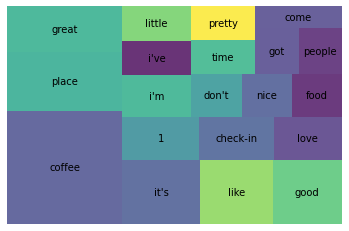

In [40]:
# Squarify the baseline tokens
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

# BASELINE WITH EXTENDED STOP WORDS

The words coffee, check-in, 1, I've, i'm , it's appear to be worthless in our analysis, so let's add them to our stop words

In [41]:
STOP_WORDS = nlp.Defaults.stop_words.union(['coffee', 'check-in', '1', "I've", "i'm", "it's"])

In [42]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [43]:
shops['tokens'].head()

0    [love, love, loved, atmosphere!, corner, shop,...
1    [listed, date, night:, austin,, ambiance, aust...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

In [44]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
90,place,3029,4264,1.0,0.011296,0.011296,0.397715
95,great,2438,3250,2.0,0.008610,0.019905,0.320116
158,like,2034,2902,3.0,0.007688,0.027593,0.267069
179,good,2084,2779,4.0,0.007362,0.034955,0.273634
3,love,1434,1806,5.0,0.004784,0.039739,0.188288


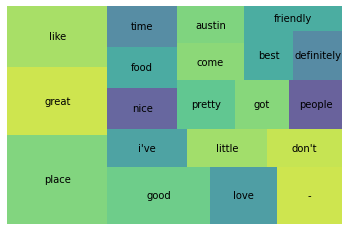

In [45]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

# BASELINE WITH STATISTICAL TRIMMING

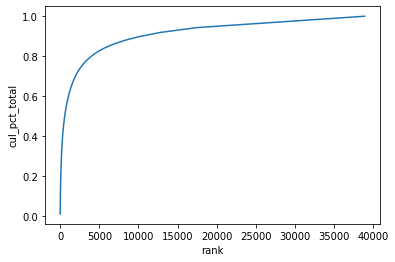

In [46]:
# Look at cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [47]:
# Look at the 20 words at the bottom of the list
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38886,delicious...and,1,1,38889.0,0.000003,0.999950,0.000131
38894,"(turkey,",1,1,38890.0,0.000003,0.999952,0.000131
38890,romaine,1,1,38891.0,0.000003,0.999955,0.000131
38889,"rib,",1,1,38892.0,0.000003,0.999958,0.000131
38892,"predictably,",1,1,38893.0,0.000003,0.999960,0.000131
38888,blts,1,1,38894.0,0.000003,0.999963,0.000131
38891,(+,1,1,38895.0,0.000003,0.999966,0.000131
38893,turkey),1,1,38896.0,0.000003,0.999968,0.000131
38895,(pork),1,1,38897.0,0.000003,0.999971,0.000131
38898,roomier,1,1,38898.0,0.000003,0.999974,0.000131


In [48]:
wc['appears_in_pct'].describe()

count    38908.000000
mean         0.001161
std          0.006482
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000394
max          0.397715
Name: appears_in_pct, dtype: float64

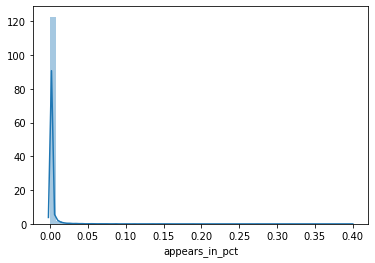

In [49]:
# Frequency of appears_in documents
sns.distplot(wc['appears_in_pct']);

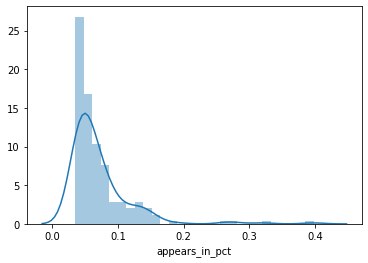

In [50]:
# Map with words appearing in at least 3.5% of documents
wc = wc[wc['appears_in_pct'] >= 0.035]

sns.distplot(wc['appears_in_pct']);

In [51]:
wc.shape

(193, 7)

# BASELINE WITH LEMMATIZATION

In [52]:
# Create lemmatization function
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
            
    return lemmas

In [53]:
# Create lemmas column and set it to get_lemmas
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [54]:
shops['lemmas'].head()

0    [1, check, Love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
3    [cool, decor, good, drink, nice, seating, over...
4    [1, check, locate, Northcross, mall, shopping,...
Name: lemmas, dtype: object

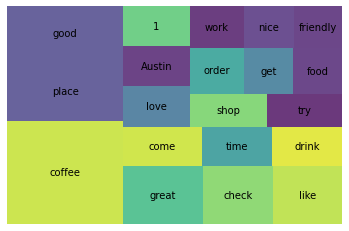

In [55]:
# Count with lemmatization
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [56]:
# Seperate by star-rating: 1-3 stars = 'bad', 4-5 stars = 'good'
bad_shops = shops[shops['star_rating'] <= 3]
good_shops = shops[shops['star_rating'] > 3]

In [57]:
bad_shops['star_rating'].value_counts()

3.0    738
2.0    460
1.0    278
Name: star_rating, dtype: int64

In [59]:
good_shops['star_rating'].value_counts()

5.0    3780
4.0    2360
Name: star_rating, dtype: int64

# good_shops and bad_shops lemmatized

In [60]:
bad_shops['lemmas'] = bad_shops['full_review_text'].apply(get_lemmas)
good_shops['lemmas'] = good_shops['full_review_text'].apply(get_lemmas)

//anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
//anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
bad_shops['lemmas'].head()

3     [cool, decor, good, drink, nice, seating, over...
8     [1, check, ok, let, try, approach, pro, music,...
11    [store, a+, decoration, honestly, coffee, good...
12    [1, check, list, 2016, time, Charm, Factory, a...
25    [okay, visit, friend, LA, try, mint, mojito, i...
Name: lemmas, dtype: object

In [62]:
good_shops['lemmas'].head()

0    [1, check, Love, love, love, atmosphere, corne...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [1, check, list, Brunch, Spots, love, eclectic...
4    [1, check, locate, Northcross, mall, shopping,...
5    [1, check, cute, cafe, think, moment, step, fi...
Name: lemmas, dtype: object

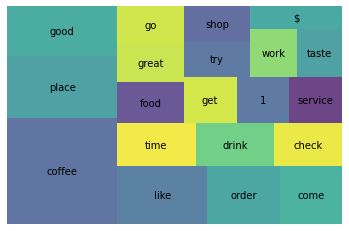

In [69]:
bad_shops_wc = count(bad_shops['lemmas'])
bad_shops_top20 = bad_shops_wc[bad_shops_wc['rank'] <= 20]

squarify.plot(sizes=bad_shops_top20['pct_total'], label=bad_shops_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

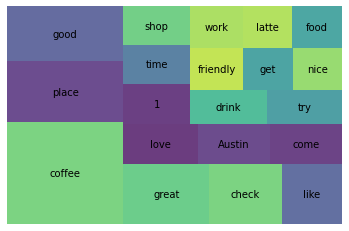

In [70]:
good_shops_wc = count(good_shops['lemmas'])
good_shops_top20 = good_shops_wc[good_shops_wc['rank'] <= 20]

squarify.plot(sizes=good_shops_top20['pct_total'], label=good_shops_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [71]:
bad_shops_top20.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,coffee,934,2120,1.0,0.026785,0.026785,0.632791
8,place,753,1226,2.0,0.015490,0.042275,0.510163
26,good,645,997,3.0,0.012597,0.054872,0.436992
0,like,596,945,4.0,0.011940,0.066812,0.403794
84,order,433,763,5.0,0.009640,0.076452,0.293360
72,come,452,650,6.0,0.008212,0.084664,0.306233
232,time,423,612,7.0,0.007732,0.092397,0.286585
23,drink,361,608,8.0,0.007682,0.100078,0.244580
88,check,488,526,9.0,0.006646,0.106724,0.330623
77,food,321,499,10.0,0.006305,0.113029,0.217480


In [72]:
good_shops_top20.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,coffee,3919,8041,1.0,0.028458,0.028458,0.638274
82,place,3127,4810,2.0,0.017023,0.045481,0.509283
198,good,2929,4349,3.0,0.015392,0.060873,0.477036
86,great,2499,3458,4.0,0.012238,0.073111,0.407003
10,check,2686,2941,5.0,0.010409,0.083520,0.437459
178,like,1677,2434,6.0,0.008614,0.092134,0.273127
0,love,1575,2069,7.0,0.007322,0.099457,0.256515
46,Austin,1544,1988,8.0,0.007036,0.106493,0.251466
395,come,1480,1988,9.0,0.007036,0.113528,0.241042
28,1,1722,1805,10.0,0.006388,0.119916,0.280456


# Lemmatized 'good', 'bad' shops with statistical trimming

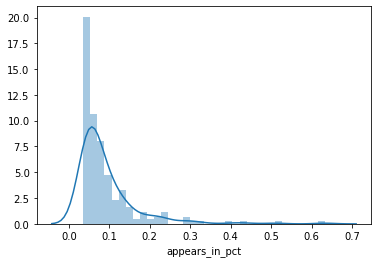

In [74]:
# Map with words appearing in at least 3.5% of bad_shops
bad_shops_wc = bad_shops_wc[bad_shops_wc['appears_in_pct'] >= 0.035]

sns.distplot(bad_shops_wc['appears_in_pct']);

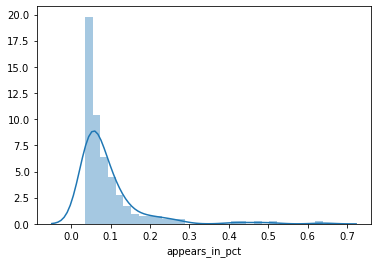

In [75]:
# Map with words appearing in at least 3.5% of good_shops
good_shops_wc = good_shops_wc[good_shops_wc['appears_in_pct'] >= 0.035]

sns.distplot(good_shops_wc['appears_in_pct']);

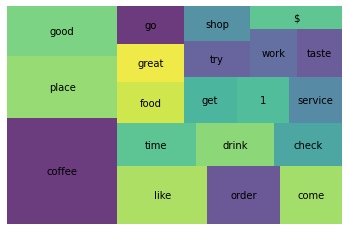

In [76]:
bad_shops_top20 = bad_shops_wc[bad_shops_wc['rank'] <= 20]

squarify.plot(sizes=bad_shops_top20['pct_total'], label=bad_shops_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

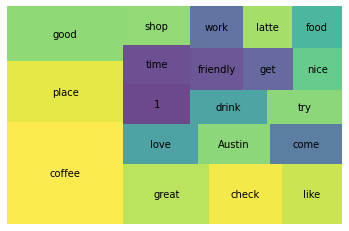

In [77]:
good_shops_top20 = good_shops_wc[good_shops_wc['rank'] <= 20]

squarify.plot(sizes=good_shops_top20['pct_total'], label=good_shops_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

# Lemmatized and trimmed 'good', 'bad' shops with extended stop words

In [91]:
STOP_WORDS = nlp.Defaults.stop_words.union(['good', 'place', 'coffee', '1', 'check', 'Austin', 'come'])

In [92]:
# Create lemmatization function
def get_lemmas(text):
    
    lemmas = []
    
    doc = nlp(text)
    
    for token in doc:
        if((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON') and (token.text.lower() not in STOP_WORDS):
            lemmas.append(token.lemma_)
            
    return lemmas

In [93]:
bad_shops['lemmas'] = bad_shops['full_review_text'].apply(get_lemmas)

//anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [94]:
good_shops['lemmas'] = good_shops['full_review_text'].apply(get_lemmas)

//anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


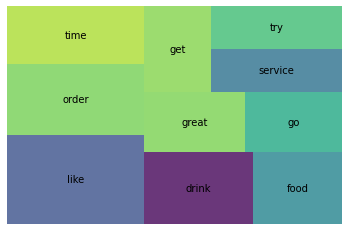

In [95]:
bad_shops_wc = count(bad_shops['lemmas'])
# Map with words appearing in at least 3.5% of bad_shops
bad_shops_wc = bad_shops_wc[bad_shops_wc['appears_in_pct'] >= 0.035]

bad_shops_top10 = bad_shops_wc[bad_shops_wc['rank'] <= 10]

squarify.plot(sizes=bad_shops_top10['pct_total'], label=bad_shops_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

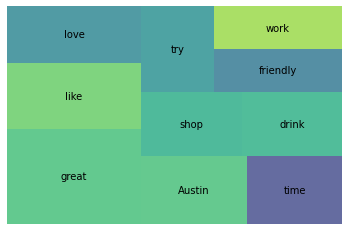

In [96]:
good_shops_wc = count(good_shops['lemmas'])
# Map with words appearing in at least 3.5% of good_shops
good_shops_wc = good_shops_wc[good_shops_wc['appears_in_pct'] >= 0.035]

good_shops_top10 = good_shops_wc[good_shops_wc['rank'] <= 10]

squarify.plot(sizes=good_shops_top10['pct_total'], label=good_shops_top10['word'], alpha=.8)
plt.axis('off')
plt.show()

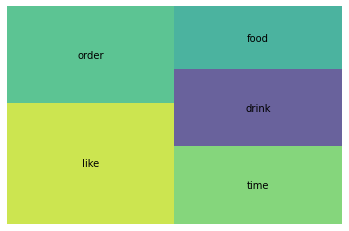

In [97]:
bad_shops_top5 = bad_shops_wc[bad_shops_wc['rank'] <= 5]

squarify.plot(sizes=bad_shops_top5['pct_total'], label=bad_shops_top5['word'], alpha=.8)
plt.axis('off')
plt.show()

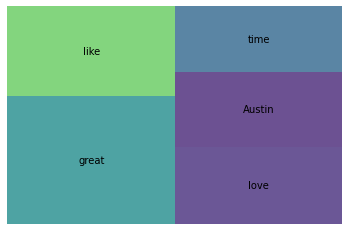

In [98]:
good_shops_top5 = good_shops_wc[good_shops_wc['rank'] <= 5]

squarify.plot(sizes=good_shops_top5['pct_total'], label=good_shops_top5['word'], alpha=.8)
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

